**Código base en:**

How to Control the Stability of Training Neural Networks With the Batch Size
by Jason Brownlee on January 21, 2019 in Deep Learning Performance

https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/




**************************************************
Batch_size:  1
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8000/8000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7020 - loss: 1.2686 - val_accuracy: 0.7795 - val_loss: 0.4803
Epoch 2/200
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8105 - loss: 0.4463 - val_accuracy: 0.8230 - val_loss: 0.4246
Epoch 3/200
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8199 - loss: 0.4185 - val_accuracy: 0.8200 - val_loss: 0.4230
Epoch 4/200
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8188 - loss: 0.4277 - val_accuracy: 0.8115 - val_loss: 0.4322
Epoch 5/200
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8122 - loss: 0.4322 - val_accuracy: 0.8195 - val_loss: 0.4052
Epoch 6/200
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8187 - loss: 0.4166 - val_accuracy: 0.8250 - val_loss: 0.4044
Epoch 7/200
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8165 - loss: 0.4180 - val_accuracy: 0.8240 - val_loss: 0.3973
Epoch 8/200
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8192 - loss: 0.421

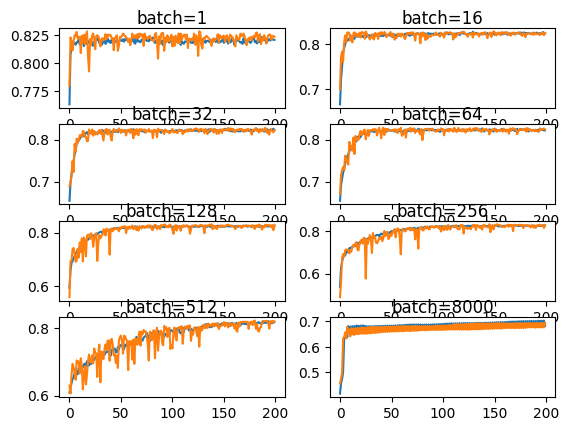

In [1]:
# mlp for the blobs problem with minibatch gradient descent with varied batch size
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
from datetime import datetime

# prepare train and test dataset
num_muestras = 10000
n_epochs = 200

def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=num_muestras, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = int( num_muestras * 0.8 )
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=n_epochs,
                        verbose=1, batch_size=n_batch)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('batch='+str(n_batch), pad=-40)

# prepare dataset
tiempos = {}
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
batch_sizes = [1, 16, 32, 64, 128, 256, 512, len(trainX)]
for i in range(len(batch_sizes)):
    print("\n\n")
    print("*"*50)
    print("Batch_size: ", batch_sizes[i])

    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)

    # fit model and plot learning curves for a batch size
    now1 = datetime.now()
    current_time1 = now1.timestamp()

    fit_model(trainX, trainy, testX, testy, batch_sizes[i])

    now2 = datetime.now()
    current_time2 = now2.timestamp()
    tiempos[batch_sizes[i]] = current_time2 - current_time1
    print(tiempos)



# show learning curves
pyplot.show()

In [2]:
print( tiempos )

{1: 2093.891760110855, 16: 152.28066086769104, 32: 83.65158796310425, 64: 47.989768981933594, 128: 32.57090997695923, 256: 25.23189616203308, 512: 24.18247699737549, 8000: 16.981903076171875}
